In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import cv2

In [3]:
data=pd.read_csv("fer2013.csv")

data.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [12]:
data=data.drop('Usage',axis=1)

In [13]:
data.shape

(35887, 2)

In [14]:
data["emotion"].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [15]:
data.isna()

,emotion,pixels
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
35882,False,False
35883,False,False
35884,False,False
35885,False,False


In [28]:
data['pixels'] = data['pixels'].apply(lambda x: x.reshape(48, 48, 1) if isinstance(x, np.ndarray) else np.array(x.split(), dtype='float32').reshape(48, 48, 1))

In [38]:
x = np.array([pixels for pixels in data['pixels']])

In [46]:
x.dtype

dtype('float32')

In [41]:
x.shape

(35887, 48, 48, 1)

In [50]:
y = data['emotion'].values

In [51]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=int64)

In [64]:
x=x/255.0

In [65]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(x)


In [66]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 output classes for 7 emotions


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [71]:
from sklearn.model_selection import train_test_split

In [73]:
# Set parameters
batch_size = 64
epochs = 50

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Create training data generator
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

# Train model
history = model.fit(train_generator, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.2516 - loss: 1.8185 - val_accuracy: 0.2459 - val_loss: 1.8166
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.2507 - loss: 1.8182 - val_accuracy: 0.2459 - val_loss: 1.8160
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.2523 - loss: 1.8188 - val_accuracy: 0.2459 - val_loss: 1.8137
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.2460 - loss: 1.8197 - val_accuracy: 0.2459 - val_loss: 1.8154
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.2504 - loss: 1.8155 - val_accuracy: 0.2459 - val_loss: 1.8115
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.2566 - loss: 1.8114 - val_accuracy: 0.2459 - val_loss: 1.8052
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.2529 - loss: 1.8044 - val_accuracy: 0.2478 - val_loss: 1.7820
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.2542 - loss: 1.7901 - 

In [76]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_val, y_val)

print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3398 - loss: 1.6753
Validation Loss: 1.6687
Validation Accuracy: 0.3484


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.10      0.16       985
           1       0.00      0.00      0.00       102
           2       0.24      0.04      0.07      1043
           3       0.38      0.70      0.49      1765
           4       0.31      0.16      0.21      1210
           5       0.40      0.52      0.45       795
           6       0.28      0.41      0.33      1278

    accuracy                           0.35      7178
   macro avg       0.29      0.28      0.25      7178
weighted avg       0.33      0.35      0.30      7178



c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

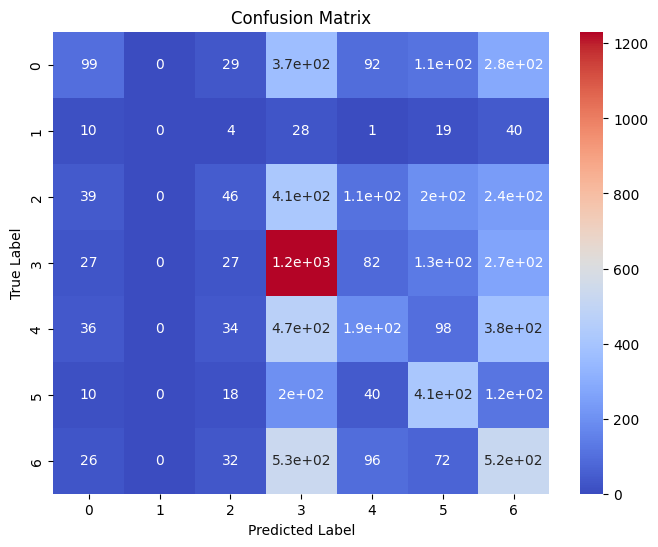

In [79]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions on the validation set
y_pred = np.argmax(model.predict(x_val), axis=1)

# Create the classification report
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)

# Plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()